In [1]:
#Bibliotecas
source('utils.r',local=TRUE)
library(MASS)
library(car)
library(statmod)

Loading required package: lattice
Loading required package: ggplot2
Loading required package: gplots

Attaching package: ‘gplots’

The following object is masked from ‘package:stats’:

    lowess

Loading required package: Matrix
Loading required package: foreach
Loaded glmnet 2.0-13

Type 'citation("pROC")' for a citation.

Attaching package: ‘pROC’

The following object is masked from ‘package:glmnet’:

    auc

The following objects are masked from ‘package:stats’:

    cov, smooth, var



In [2]:
#Leitura do dataset já tratado
data_frame = read_dataset(split=FALSE)

In [3]:
#MODELOS A SEREM TESTADOS

#Criando modelo geral
general = glm(default ~ .,family = binomial(link = logit),data=data_frame)

#Modelo com backward via aic
backAIC = stepAIC(general, direction = 'backward')

#Modeo backward via bic
backBIC = step(general, k = log(nrow(data_frame)))

#Modelo com forward via aic
forAIC = stepAIC(general, direction = 'forward')

#Modelo com stepwise via aic
stepAIC = stepAIC(general, direction = 'both')

#Criando matriz com os fatores expandidos
x = model.matrix(default ~ ., data = data_frame)[, -1]
y <- ifelse(data_frame$default == 0, 1, 0)

#Regularização com método Lasso
lasso <- cv.glmnet(x, y, family = 'binomial', alpha = 1, nfolds = 10)

#Regularização com método Ridge
ridge <- cv.glmnet(x, y, family = 'binomial', alpha = 0, nfolds = 10)

#Knn
ctrl <- trainControl(method="repeatedcv",repeats = 2)
knn <- train(default ~ ., data = data_frame, method = "knn", trControl = ctrl, tuneLength = 5)

Start:  AIC=442.32
default ~ idade + educacao + t_emprego + t_endereco + renda + 
    divida + divida_cc + outras_div + div

             Df Deviance    AIC
- renda       1   422.86 440.86
- educacao    1   423.17 441.17
- idade       1   423.32 441.32
- divida_cc   1   423.45 441.45
- div         1   423.54 441.54
- outras_div  1   423.55 441.55
<none>            422.32 442.32
- divida      1   426.71 444.71
- t_endereco  1   433.56 451.56
- t_emprego   1   457.48 475.48

Step:  AIC=440.86
default ~ idade + educacao + t_emprego + t_endereco + divida + 
    divida_cc + outras_div + div

             Df Deviance    AIC
- divida_cc   1   424.01 440.01
- idade       1   424.04 440.04
- outras_div  1   424.11 440.11
- div         1   424.12 440.12
- educacao    1   424.38 440.38
<none>            422.86 440.86
- divida      1   428.36 444.36
- t_endereco  1   434.01 450.01
- t_emprego   1   464.16 480.16

Step:  AIC=440.01
default ~ idade + educacao + t_emprego + t_endereco + divida + 
   

In [4]:
#Descrição dos modelos
summary(general)
summary(backAIC)
summary(backBIC)
summary(forAIC)
summary(stepAIC)

#Note que general e forAIC geraram os mesmos modelos
#Note que backAIC e stepAIC geraram os mesmos modelos
#Portanto, iremos usar os seguintes modelos de glm daqui pra frente : forAIC, stepAIC, backBIC


Call:
glm(formula = default ~ ., family = binomial(link = logit), data = data_frame)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.6183  -0.3699   0.3601   0.6729   2.1056  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -11.7518    13.7309  -0.856  0.39207    
idade        -0.1605     0.1603  -1.001  0.31676    
educacao     -0.1691     0.1831  -0.924  0.35571    
t_emprego     1.2601     0.2286   5.512 3.55e-08 ***
t_endereco    0.5517     0.1690   3.265  0.00109 ** 
renda        -0.2542     0.3435  -0.740  0.45924    
divida       -0.7072     0.3348  -2.112  0.03467 *  
divida_cc    20.9217    19.7727   1.058  0.29000    
outras_div   18.3578    16.5881   1.107  0.26843    
div         -36.5000    33.1977  -1.099  0.27156    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 570.95  on 499  degrees of freedom
Residual deviance: 422


Call:
glm(formula = default ~ t_emprego + t_endereco + divida + outras_div + 
    div, family = binomial(link = logit), data = data_frame)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.5195  -0.4499   0.3755   0.6821   1.9711  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)   3.1930     0.6780   4.710 2.48e-06 ***
t_emprego     1.2112     0.1857   6.523 6.87e-11 ***
t_endereco    0.4605     0.1471   3.131  0.00174 ** 
divida       -0.3731     0.2026  -1.842  0.06548 .  
outras_div    0.6132     0.3016   2.033  0.04203 *  
div          -1.6980     0.3560  -4.769 1.85e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 570.95  on 499  degrees of freedom
Residual deviance: 426.79  on 494  degrees of freedom
AIC: 438.79

Number of Fisher Scoring iterations: 5



Call:
glm(formula = default ~ t_emprego + t_endereco + div, family = binomial(link = logit), 
    data = data_frame)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.5345  -0.5933   0.3704   0.7216   1.9806  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)   4.2545     0.5508   7.724 1.13e-14 ***
t_emprego     1.3437     0.1741   7.719 1.17e-14 ***
t_endereco    0.4848     0.1437   3.374 0.000741 ***
div          -1.5333     0.1870  -8.198 2.45e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 570.95  on 499  degrees of freedom
Residual deviance: 432.95  on 496  degrees of freedom
AIC: 440.95

Number of Fisher Scoring iterations: 5



Call:
glm(formula = default ~ idade + educacao + t_emprego + t_endereco + 
    renda + divida + divida_cc + outras_div + div, family = binomial(link = logit), 
    data = data_frame)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.6183  -0.3699   0.3601   0.6729   2.1056  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -11.7518    13.7309  -0.856  0.39207    
idade        -0.1605     0.1603  -1.001  0.31676    
educacao     -0.1691     0.1831  -0.924  0.35571    
t_emprego     1.2601     0.2286   5.512 3.55e-08 ***
t_endereco    0.5517     0.1690   3.265  0.00109 ** 
renda        -0.2542     0.3435  -0.740  0.45924    
divida       -0.7072     0.3348  -2.112  0.03467 *  
divida_cc    20.9217    19.7727   1.058  0.29000    
outras_div   18.3578    16.5881   1.107  0.26843    
div         -36.5000    33.1977  -1.099  0.27156    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial f


Call:
glm(formula = default ~ t_emprego + t_endereco + divida + outras_div + 
    div, family = binomial(link = logit), data = data_frame)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.5195  -0.4499   0.3755   0.6821   1.9711  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)   3.1930     0.6780   4.710 2.48e-06 ***
t_emprego     1.2112     0.1857   6.523 6.87e-11 ***
t_endereco    0.4605     0.1471   3.131  0.00174 ** 
divida       -0.3731     0.2026  -1.842  0.06548 .  
outras_div    0.6132     0.3016   2.033  0.04203 *  
div          -1.6980     0.3560  -4.769 1.85e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 570.95  on 499  degrees of freedom
Residual deviance: 426.79  on 494  degrees of freedom
AIC: 438.79

Number of Fisher Scoring iterations: 5


In [5]:
#Verificando colineariedade
vif(forAIC)
vif(stepAIC)
vif(backBIC)

#Note que o modelo forAIC e stepAIC possuem vif maior que 5, logo, serão descartados
#Portanto, o modelo restante é o backBIC

idade     educacao    t_emprego   t_endereco        renda       divida 
    1.815835     1.446802     2.672315     1.543029     7.346349     6.847012 
   divida_cc   outras_div          div 
20465.971101 15408.232665 57866.095728

t_emprego t_endereco     divida outras_div        div 
  1.779222   1.189541   2.516409   4.868922   6.453628

t_emprego t_endereco        div 
  1.557189   1.167697   1.747636

In [6]:
#MELHORANDO MODELOS E IDENTIFICANDO AS INTERAÇÕES

#Partindo do modelo backBIC iremos adicionar variaveis manualmente 
#assim como as interações para veficar se há melhoras no modelo
#Essas adições foram baseadas na Análise Exploratória e nos testes anteriores

summary(update(backBIC, default ~ . + renda))
summary(update(backBIC, default ~ . + renda + renda:t_emprego))
summary(update(backBIC, default ~ . + renda + renda:div))
summary(update(backBIC, default ~ . + renda + renda:div + renda:t_emprego))
summary(update(backBIC, default ~ . + outras_div + divida_cc + outras_div:divida_cc))
summary(update(backBIC, default ~ . + idade + t_endereco:idade))
summary(update(backBIC, default ~ . + idade + t_emprego:idade))
summary(update(backBIC, default ~ . + educacao + educacao:renda))

#Note que o modelos mais interassantes segundo o AIC e suas significâncias são os de baixo:
alternative1 = update(backBIC, default ~ . + renda + renda:t_emprego)
alternative2 = update(backBIC, default ~ . + renda + renda:div)
alternative3 = update(backBIC, default ~ . + idade + t_endereco:idade)
alternative4 = update(backBIC, default ~ . + idade + t_emprego:idade)

#Portanto, temos ao final oito modelos que serão utilizados daqui pra frente:
#backBIC
#alternative1
#alternative2
#alternative3
#alternative4
#lasso
#ridge
#knn


Call:
glm(formula = default ~ t_emprego + t_endereco + div + renda, 
    family = binomial(link = logit), data = data_frame)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.5121  -0.5764   0.3658   0.7180   1.9606  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)   4.3523     0.5649   7.705 1.31e-14 ***
t_emprego     1.2439     0.2000   6.221 4.95e-10 ***
t_endereco    0.4616     0.1452   3.178  0.00148 ** 
div          -1.6127     0.2062  -7.822 5.21e-15 ***
renda         0.1923     0.1980   0.971  0.33147    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 570.95  on 499  degrees of freedom
Residual deviance: 431.99  on 495  degrees of freedom
AIC: 441.99

Number of Fisher Scoring iterations: 5



Call:
glm(formula = default ~ t_emprego + t_endereco + div + renda + 
    t_emprego:renda, family = binomial(link = logit), data = data_frame)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.7027  -0.4940   0.3439   0.6899   1.9960  

Coefficients:
                Estimate Std. Error z value Pr(>|z|)    
(Intercept)       3.6482     0.5954   6.127 8.94e-10 ***
t_emprego         2.1164     0.3504   6.040 1.54e-09 ***
t_endereco        0.4870     0.1462   3.330 0.000867 ***
div              -1.6296     0.2081  -7.832 4.81e-15 ***
renda             0.6669     0.2471   2.699 0.006963 ** 
t_emprego:renda  -0.4005     0.1218  -3.287 0.001012 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 570.95  on 499  degrees of freedom
Residual deviance: 421.59  on 494  degrees of freedom
AIC: 433.59

Number of Fisher Scoring iterations: 5



Call:
glm(formula = default ~ t_emprego + t_endereco + div + renda + 
    div:renda, family = binomial(link = logit), data = data_frame)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.6042  -0.3589   0.3311   0.7054   1.8988  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)   1.4272     0.8529   1.673  0.09424 .  
t_emprego     1.3916     0.2179   6.387 1.69e-10 ***
t_endereco    0.4887     0.1510   3.237  0.00121 ** 
div          -0.8228     0.2706  -3.041  0.00236 ** 
renda         2.3356     0.5884   3.969 7.21e-05 ***
div:renda    -0.5534     0.1446  -3.827  0.00013 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 570.95  on 499  degrees of freedom
Residual deviance: 414.96  on 494  degrees of freedom
AIC: 426.96

Number of Fisher Scoring iterations: 6



Call:
glm(formula = default ~ t_emprego + t_endereco + div + renda + 
    div:renda + t_emprego:renda, family = binomial(link = logit), 
    data = data_frame)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.6335  -0.3777   0.3291   0.6929   1.9093  

Coefficients:
                Estimate Std. Error z value Pr(>|z|)    
(Intercept)      1.60722    0.92937   1.729 0.083743 .  
t_emprego        1.57745    0.41939   3.761 0.000169 ***
t_endereco       0.48975    0.15039   3.257 0.001128 ** 
div             -0.91596    0.32745  -2.797 0.005154 ** 
renda            2.16965    0.66170   3.279 0.001042 ** 
div:renda       -0.48273    0.19619  -2.460 0.013874 *  
t_emprego:renda -0.09651    0.18372  -0.525 0.599373    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 570.95  on 499  degrees of freedom
Residual deviance: 414.69  on 493  degrees of freedom
AIC: 428.69

Number 


Call:
glm(formula = default ~ t_emprego + t_endereco + div + outras_div + 
    divida_cc + outras_div:divida_cc, family = binomial(link = logit), 
    data = data_frame)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.6233  -0.4202   0.3548   0.6769   2.1728  

Coefficients:
                     Estimate Std. Error z value Pr(>|z|)    
(Intercept)          -17.5339    13.8570  -1.265  0.20575    
t_emprego              1.5341     0.1940   7.907 2.64e-15 ***
t_endereco             0.5401     0.1514   3.568  0.00036 ***
div                  -43.2426    33.2639  -1.300  0.19360    
outras_div            22.2216    16.6503   1.335  0.18200    
divida_cc             26.0272    19.8441   1.312  0.18966    
outras_div:divida_cc  -0.3703     0.1139  -3.252  0.00115 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 570.95  on 499  degrees of freedom
Residual deviance: 419.7


Call:
glm(formula = default ~ t_emprego + t_endereco + div + idade + 
    t_endereco:idade, family = binomial(link = logit), data = data_frame)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.5971  -0.5342   0.3578   0.6954   2.0666  

Coefficients:
                 Estimate Std. Error z value Pr(>|z|)    
(Intercept)        3.9032     0.5862   6.659 2.76e-11 ***
t_emprego          1.3698     0.1833   7.474 7.80e-14 ***
t_endereco         1.2242     0.3758   3.258  0.00112 ** 
div               -1.5618     0.1912  -8.170 3.09e-16 ***
idade              0.1488     0.1947   0.765  0.44454    
t_endereco:idade  -0.2613     0.1261  -2.073  0.03819 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 570.95  on 499  degrees of freedom
Residual deviance: 428.23  on 494  degrees of freedom
AIC: 440.23

Number of Fisher Scoring iterations: 5



Call:
glm(formula = default ~ t_emprego + t_endereco + div + idade + 
    t_emprego:idade, family = binomial(link = logit), data = data_frame)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.7097  -0.5052   0.3554   0.7022   2.1479  

Coefficients:
                Estimate Std. Error z value Pr(>|z|)    
(Intercept)       3.6933     0.5931   6.227 4.75e-10 ***
t_emprego         2.2459     0.3711   6.051 1.44e-09 ***
t_endereco        0.5129     0.1620   3.166  0.00154 ** 
div              -1.5318     0.1894  -8.090 5.99e-16 ***
idade             0.2423     0.1958   1.238  0.21576    
t_emprego:idade  -0.3654     0.1292  -2.828  0.00468 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 570.95  on 499  degrees of freedom
Residual deviance: 424.73  on 494  degrees of freedom
AIC: 436.73

Number of Fisher Scoring iterations: 5



Call:
glm(formula = default ~ t_emprego + t_endereco + div + educacao + 
    educacao:renda, family = binomial(link = logit), data = data_frame)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.5390  -0.5867   0.3705   0.7167   1.9994  

Coefficients:
                Estimate Std. Error z value Pr(>|z|)    
(Intercept)     4.321465   0.696185   6.207 5.39e-10 ***
t_emprego       1.328450   0.199899   6.646 3.02e-11 ***
t_endereco      0.485721   0.145510   3.338 0.000844 ***
div            -1.526148   0.196858  -7.753 9.01e-15 ***
educacao       -0.053483   0.256806  -0.208 0.835023    
educacao:renda  0.004847   0.084042   0.058 0.954009    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 570.95  on 499  degrees of freedom
Residual deviance: 432.87  on 494  degrees of freedom
AIC: 444.87

Number of Fisher Scoring iterations: 5


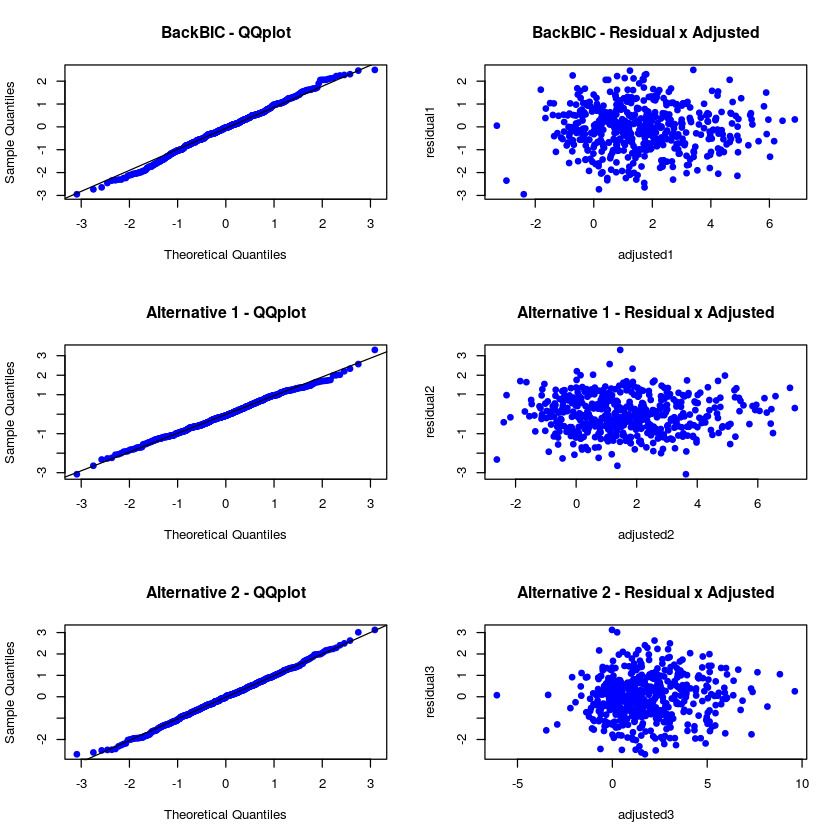

In [7]:
#ANÁLISE DE RESÍDUOS DOS GLM'S
par(mfrow=c(3,2))

#qqplot dos resíduos
residual1 = qresiduals(backBIC)
qqnorm(residual1, pch = 20, cex = 1.4, col = 'blue',main = 'BackBIC - QQplot')
qqline(residual1)

#resíduos vs valores ajustados
adjusted1 <- predict(backBIC,newdata=data_frame)
plot(residual1 ~ adjusted1, pch = 20, cex = 1.4, col = 'blue',main='BackBIC - Residual x Adjusted')

#qqplot dos resíduos
residual2 = qresiduals(alternative1)
qqnorm(residual2, pch = 20, cex = 1.4, col = 'blue',main = 'Alternative 1 - QQplot')
qqline(residual2)

#resíduos vs valores ajustados
adjusted2 <- predict(alternative1,newdata=data_frame)
plot(residual2 ~ adjusted2, pch = 20, cex = 1.4, col = 'blue',main='Alternative 1 - Residual x Adjusted')

#qqplot dos resíduos
residual3 = qresiduals(alternative2)
qqnorm(residual3, pch = 20, cex = 1.4, col = 'blue',main = 'Alternative 2 - QQplot')
qqline(residual3)

#resíduos vs valores ajustados
adjusted3 <- predict(alternative2,newdata=data_frame)
plot(residual3 ~ adjusted3, pch = 20, cex = 1.4, col = 'blue',main='Alternative 2 - Residual x Adjusted')

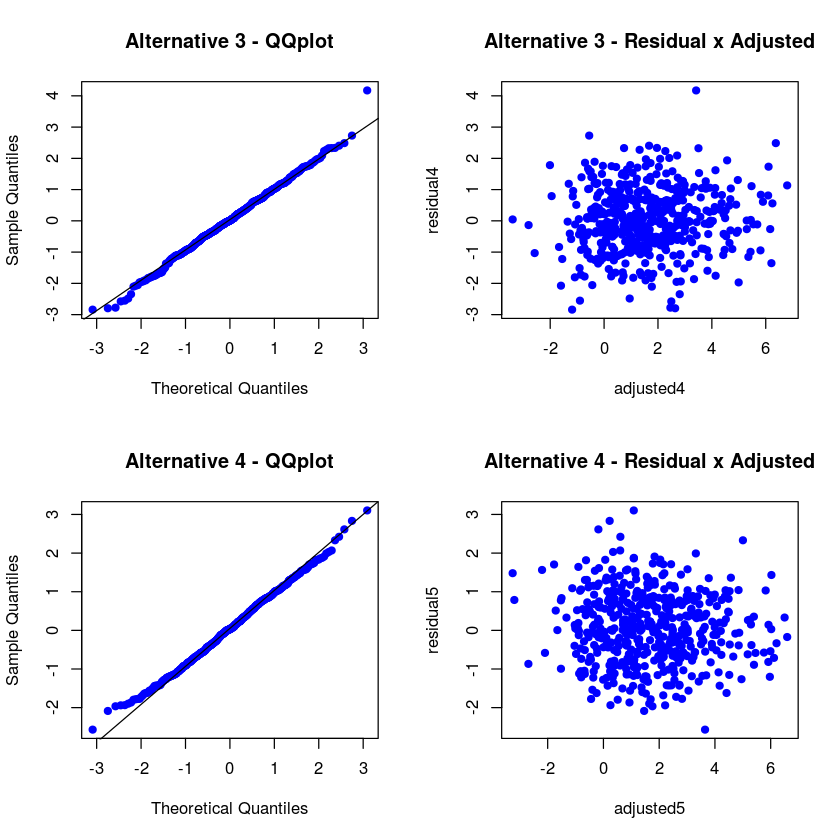

In [8]:
par(mfrow=c(2,2))

#qqplot dos resíduos
residual4 = qresiduals(alternative3)
qqnorm(residual4, pch = 20, cex = 1.4, col = 'blue',main = 'Alternative 3 - QQplot')
qqline(residual4)

#resíduos vs valores ajustados
adjusted4 <- predict(alternative3,newdata=data_frame)
plot(residual4 ~ adjusted4, pch = 20, cex = 1.4, col = 'blue',main='Alternative 3 - Residual x Adjusted')

#qqplot dos resíduos
residual5 = qresiduals(alternative4)
qqnorm(residual5, pch = 20, cex = 1.4, col = 'blue',main = 'Alternative 4 - QQplot')
qqline(residual5)

#resíduos vs valores ajustados
adjusted5 <- predict(alternative4,newdata=data_frame)
plot(residual5 ~ adjusted5, pch = 20, cex = 1.4, col = 'blue',main='Alternative 4 - Residual x Adjusted')

#Note pelos gráficos gerados do lado direito (resíduos x valores ajustado) que todos os
#modelos possuem uma nuvem aleatória de pontos, indicando que o modelo está bem ajustado.
#Contudo ao analisar os qqplots notamos que apenas os modelos alternative1 e alternative2
#possuem erros com distribuição normal padrão ajustados. Os outros acabam possuindo erros que 'escapam'
#nas pontas, indicando que não seria adequado usá-los.
#Assim, iremos utilizar alternative1 e alternative2 como os modelos glm na etapa de classficação
#e interpretação dos parâmetros